In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

df_eddies = pd.read_pickle('/srv/scratch/z5297792/Chapter2/SEACOFS_26yr_Eddy_Dataset/df_eddies_processed_1462_10650.pkl')

with open('/srv/scratch/z5297792/Chapter2/SEACOFS_26yr_Eddy_Dataset/Vertical_Eddy_Dataset/dic_vert_eddies.pkl', 'rb') as f:
    dic_eddies_vert = pickle.load(f)
    
import sys
sys.path.append("/home/z5297792/UNSW-MRes/MRes/modules") 
from utils import plot_ellipse, smooth, rossby_number


In [2]:
sample_eddies = [474, 971, 1917, 1978, 33, 207, 1783, 2370]
dic_sample = {}
for eddy in sample_eddies:
    eddy = f'Eddy{eddy}'
    dic_sample[eddy] = dic_eddies_vert[eddy]


In [3]:
import netCDF4 as nc
from scipy.interpolate import griddata
import netCDF4 as nc
from scipy.interpolate import RegularGridInterpolator

fname = f'/srv/scratch/z3533156/26year_BRAN2020/outer_avg_01461.nc'
dataset = nc.Dataset(fname)
lon_rho = np.transpose(dataset.variables['lon_rho'], axes=(1, 0))
lat_rho = np.transpose(dataset.variables['lat_rho'], axes=(1, 0))
mask_rho = np.transpose(dataset.variables['mask_rho'], axes=(1, 0))
h =  np.transpose(dataset.variables['h'], axes=(1, 0))
angle = dataset.variables['angle'][0, 0]
z_r = np.load('/srv/scratch/z5297792/z_r.npy')
z_r = np.transpose(z_r, (1, 2, 0))[150, 150, :]
def distance(lat1, lon1, lat2, lon2):
    EARTH_RADIUS = 6357
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat, dlon = lat2 - lat1, lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return EARTH_RADIUS * 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
j_mid = lon_rho.shape[1] // 2
i_mid = lon_rho.shape[0] // 2
dx = distance(lat_rho[:-1, j_mid], lon_rho[:-1, j_mid],
              lat_rho[1:, j_mid], lon_rho[1:, j_mid])
dy = distance(lat_rho[i_mid, :-1], lon_rho[i_mid, :-1],
              lat_rho[i_mid, 1:], lon_rho[i_mid, 1:])
x_grid = np.insert(np.cumsum(dx), 0, 0)
y_grid = np.insert(np.cumsum(dy), 0, 0)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid, indexing='ij')


In [4]:
# Unique colors for each eddy
colors = [c for i, c in enumerate(plt.get_cmap("tab10").colors) if i != 7]


In [13]:
n = len(z_r)
base = pd.DataFrame({'Depth': -z_r})
frames = []

for eddy, dic in dic_sample.items():
    for d, df in enumerate(dic.values()):
        tmp = (df[['x','y']] if not df.empty else pd.DataFrame(index=[], columns=['x','y']))
        tmp = tmp.reindex(range(n))                     # pads with NaNs
        tmp.columns = [f'{eddy}_x_{d}', f'{eddy}_y_{d}']
        frames.append(tmp)

df_depths = pd.concat([base, *frames], axis=1, copy=False)
df_depths

,Depth,Eddy474_x_0,Eddy474_y_0,Eddy474_x_1,Eddy474_y_1,Eddy474_x_2,Eddy474_y_2,Eddy474_x_3,Eddy474_y_3,Eddy474_x_4,...,Eddy2370_x_52,Eddy2370_y_52,Eddy2370_x_53,Eddy2370_y_53,Eddy2370_x_54,Eddy2370_y_54,Eddy2370_x_55,Eddy2370_y_55,Eddy2370_x_56,Eddy2370_y_56
0,1.783320,261.940147,1484.781791,267.978468,1475.124406,273.685154,1471.553962,274.518389,1466.938749,286.714636,...,253.084486,567.480090,241.881085,536.699813,238.604963,523.279677,240.586005,517.400123,242.627058,498.439709
1,5.879627,260.965478,1488.049126,264.466911,1480.149440,271.272091,1471.179537,274.681203,1464.174814,287.083872,...,247.609623,560.154560,240.715586,532.490102,238.290099,522.534501,239.280399,516.258631,243.434436,499.768934
2,10.725783,260.471844,1489.972042,262.101864,1482.901192,270.847084,1470.208384,275.398009,1460.947534,287.662950,...,246.281557,545.042801,240.745331,532.123683,238.367262,522.731495,239.246365,516.226479,243.800521,500.998354
3,16.383097,259.612592,1491.853144,260.865759,1484.093099,270.650553,1469.782545,276.326063,1457.639557,288.130683,...,243.799958,535.565244,240.616023,531.272790,238.396574,522.900646,239.201841,516.231714,243.843124,502.265386
4,22.925581,258.950594,1493.250004,260.538083,1484.370713,270.395934,1469.507403,278.737157,1453.488992,290.361253,...,243.910670,532.647053,240.598377,530.937821,238.286392,522.686191,239.195147,516.253579,243.571661,503.336370
5,30.444118,257.916347,1494.959725,260.370254,1484.488349,269.750760,1469.421221,281.396589,1449.830501,290.649392,...,243.769833,530.865328,240.644250,530.863947,238.164996,522.375225,239.006638,516.161120,243.011629,503.642985
6,39.052712,256.137154,1497.159443,259.902610,1484.968532,270.339259,1468.073245,283.079930,1447.875850,288.981463,...,243.670698,529.715716,240.596766,530.618297,238.173968,522.198867,238.825620,516.215450,242.030140,503.900624
7,48.897638,253.759778,1499.396139,258.591837,1485.414176,271.352398,1466.269413,283.499236,1447.930146,289.187917,...,243.619169,529.028098,240.506829,530.299263,238.209823,522.420784,238.481207,516.020812,241.513391,503.474732
8,60.170639,253.238687,1499.613107,262.987236,1478.952510,270.017297,1466.423582,281.895481,1450.137055,290.562189,...,243.535369,528.354243,240.444449,530.076358,238.148097,522.564441,238.168532,515.534681,241.119982,502.661505
9,73.127842,250.492186,1504.027455,263.033954,1480.053108,270.642901,1465.241011,281.047199,1449.786258,289.699494,...,243.429020,527.584898,240.481575,530.022219,237.992685,522.612111,238.053530,515.256108,240.797998,502.139416


In [14]:
n = len(z_r)
base = pd.DataFrame({'Depth': -z_r})
frames = []

for eddy, dic in dic_sample.items():
    for d, df in enumerate(dic.values()):
        tmp = (df[['TD']] if not df.empty else pd.DataFrame(index=[], columns=['TD']))
        tmp = tmp.reindex(range(n))                     # pads with NaNs
        tmp.columns = [f'{eddy}_{d}']
        frames.append(tmp)
df_depths = pd.concat([base, *frames], axis=1, copy=False)
df_depths

,Depth,Eddy474_0,Eddy474_1,Eddy474_2,Eddy474_3,Eddy474_4,Eddy474_5,Eddy474_6,Eddy474_7,Eddy474_8,...,Eddy2370_47,Eddy2370_48,Eddy2370_49,Eddy2370_50,Eddy2370_51,Eddy2370_52,Eddy2370_53,Eddy2370_54,Eddy2370_55,Eddy2370_56
0,1.783320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
1,5.879627,3.409613,6.130416,2.441939,2.768726,2.784147,5.036956,3.214277,2.424924,2.713935,...,1.705146,2.773097,3.407353,4.457174,NaN,9.145354,4.368072,0.808967,1.734246,1.555217
2,10.725783,5.393943,9.747455,3.140895,6.055443,3.699353,6.455060,8.964091,3.772259,3.822583,...,2.579791,4.346501,5.232590,6.577881,NaN,23.445933,4.714966,0.597500,1.781032,2.814903
3,16.383097,7.444566,11.446750,3.513790,9.473260,4.298363,6.864451,13.675476,6.038910,4.986148,...,3.244232,5.681487,6.357279,8.036661,NaN,33.237928,5.572518,0.432540,1.811377,4.014302
4,22.925581,8.980426,11.868172,3.873935,14.095885,7.248095,7.356477,16.573497,8.171251,7.176891,...,3.807857,6.755305,6.952575,9.052396,NaN,36.020818,5.903041,0.673582,1.802512,4.986939
5,30.444118,10.944465,12.065171,4.475270,18.439137,7.320519,8.418693,15.837572,8.670386,6.332623,...,4.297784,7.663287,7.507847,9.923579,NaN,37.780995,5.965492,1.005786,2.007368,5.217468
6,39.052712,13.670443,12.732883,4.828085,20.897227,4.454589,10.204511,15.800145,8.003932,5.870882,...,4.394558,7.448691,7.920714,10.362933,NaN,38.920012,6.215650,1.163575,2.121888,5.493442
7,48.897638,16.748063,13.927965,5.776522,21.023382,5.230403,9.090433,16.545398,7.018271,5.088891,...,4.379046,7.087094,8.193852,10.961226,NaN,39.599847,6.546420,0.945428,2.516480,5.156715
8,60.170639,17.195446,6.290214,6.306661,18.349888,6.896773,10.014883,15.594109,5.831705,4.705185,...,4.399852,6.998592,8.358361,11.474563,NaN,40.274278,6.777468,0.848698,3.053531,4.482727
9,73.127842,22.393111,6.981427,7.007757,18.353019,5.272011,11.022681,16.766616,4.900340,3.046906,...,4.418925,6.877978,8.354940,11.844934,NaN,41.046978,6.822675,0.905830,3.318167,4.127141


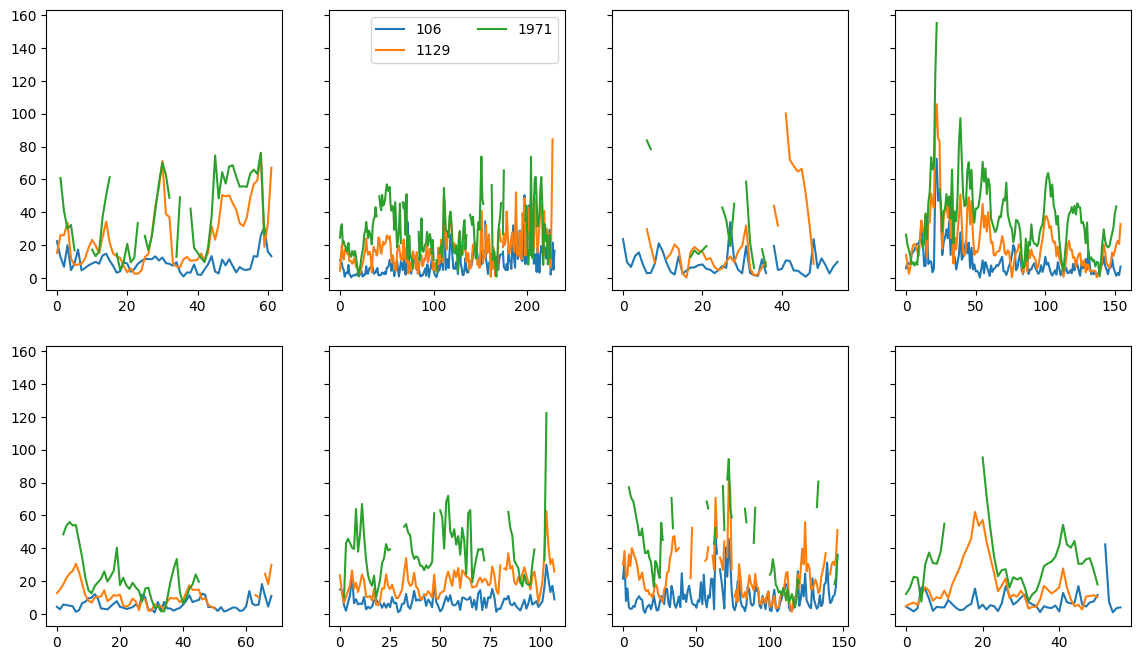

In [39]:
fig, axs = plt.subplots(2, 4, figsize=(14,8), sharey=True)
lvls = [11, 22, 24]
for e, eddy in enumerate(sample_eddies):
    ax = axs[e // 4, e % 4]
    # df_sub = df.loc[:, df.columns.str.contains(f"Eddy{eddy}") | (df.columns == "Depth")]
    df_sub = df_depths.loc[:, df_depths.columns.str.contains(f'Eddy{eddy}')]
    for lvl in lvls:
        ax.plot(df_sub.iloc[lvl].values, label=round(-z_r[lvl]))
axs[0,1].legend(ncol=2)


In [31]:
lvls

NameError: name 'lvls' is not defined